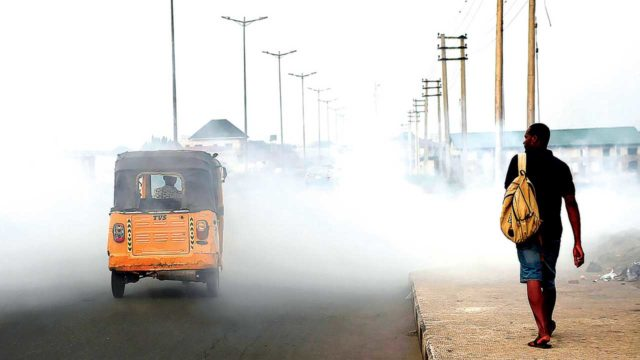

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
url = "https://guardian.ng/wp-content/uploads/2020/04/air-pollution-city-640x360.jpg"
Image(url)

# Port_Harcourt_Pollution_Readings : Preprocessing & Visualization

**Data Analysis** on the proprietory dataset provided by Pyloop 

**Why this analysis** - This Data Analysis aims to leverage data science techniques to raise awareness of Air Polution draw insights about the Air Pollution in Nigeria. The data consistw of sensor readings collected over the last 3 months i.e. July 26, 2021 to October 25, 2021. 

The purpose of the EDA consists of:
1. Applying exploratory data analysis to air quality sensor data to generate useful insights 
2. Using data visualization to create engaging dashboards to raise awareness about air pollution

The EDA, in turn, will facilitate the third step:
3. Perform time series analysis on this data to generate future predictions using machine learning techniques 
 
> - **What does the data consist of?**
    - date and time of reading
    - entry id
    - temperature (in Fahrenheit)
    - humidity (in %)
    - PM2.5 
    
  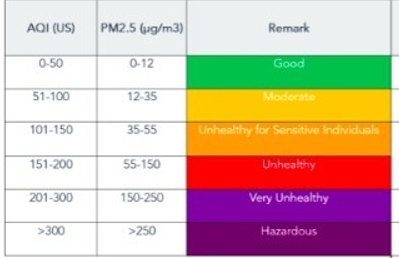
    
> - Note: PM2.5 refers to fine particulate matter less than 2.5 micrometres in diameter. At elevated levels, they reduce visibility, cause the air to appear hazy, and are a health concern. Some examples of PM2.5 are dust, spores, pollen and emissions from the combustion of diesel, gasoline, oil or wood. Elevated levels of PM2.5 can result in harmful effects such as heart disease, throat infections, lung cancer, chronic bronchitis, asthma attacks, and other respiratory diseases. 

**Tools used in This Analysis** - `Python 3` (`Pandas`& `Numpy` for the data computations and `Matplotlib`, `Seaborn` & `Plotly` for the data visualization).

> - **E**xploratory **D**ata **A**nalysis (EDA)

In [ ]:
F:\OMDENA\PortHarcourt

### What to Expect:

> - Libraries 
> - Data Preparation, Cleaning & Pre-processing
> - Data Visualization
    - Seaborn
    - Matplotlib   

In [112]:
# For data wrangling:
import pandas as pd
import numpy as np

# For queries:
import pandasql

# For conversion of object to data time:
from datetime import datetime, timezone

# Data Visualization modules:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
#%matplotlib inline statement is used to generate plot in the same .ipynb notebook

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Interactive Visualizations:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"

# To import `wordcloud` module:
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Data Preprocessing:


In [3]:
df = pd.read_csv('./Port_Harcourt_Nigeria.csv')

In [4]:
# 'shape' attribute helps to know number of rows and columns respectively:
df.shape

(56052, 5)

In [5]:
#Actual dataset
df

,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2021-07-26 16:45:59 UTC,198,89,50,40.78
1,2021-07-26 16:48:03 UTC,199,89,50,40.09
2,2021-07-26 16:49:59 UTC,200,89,50,37.93
3,2021-07-26 16:54:03 UTC,201,89,50,33.18
4,2021-07-26 16:55:59 UTC,202,89,50,37.84
5,2021-07-26 16:58:11 UTC,203,89,50,34.70
6,2021-07-26 17:00:08 UTC,204,89,51,33.83
7,2021-07-26 17:02:05 UTC,205,89,50,36.20
8,2021-07-26 17:04:02 UTC,206,89,50,32.63
9,2021-07-26 17:06:00 UTC,207,88,50,32.60


In [6]:
#First 5 rows in the dataset
df.head()

,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2021-07-26 16:45:59 UTC,198,89,50,40.78
1,2021-07-26 16:48:03 UTC,199,89,50,40.09
2,2021-07-26 16:49:59 UTC,200,89,50,37.93
3,2021-07-26 16:54:03 UTC,201,89,50,33.18
4,2021-07-26 16:55:59 UTC,202,89,50,37.84


In [7]:
#Last five rows in the dataset:
df.tail()

,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
56047,2021-10-25 09:28:43 UTC,56245,87,61,29.17
56048,2021-10-25 09:30:43 UTC,56246,87,61,29.57
56049,2021-10-25 09:32:44 UTC,56247,87,61,28.75
56050,2021-10-25 09:34:44 UTC,56248,87,61,29.97
56051,2021-10-25 09:36:44 UTC,56249,87,60,30.25


In [8]:
#Column data types
df.dtypes

created_at          object
entry_id             int64
Temperature_F        int64
Humidity_%           int64
PM2.5_ATM_ug/m3    float64
dtype: object

In [9]:
#The summary statistics of numerical columns of the dataframe:
df.describe()

,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
count,56052.000000,56052.000000,56052.000000,56052.000000
mean,28223.500000,84.821469,65.117766,54.391926
std,16180.962981,4.319505,8.550730,42.205997
min,198.000000,70.000000,29.000000,0.780000
25%,14210.750000,82.000000,61.000000,30.170000
50%,28223.500000,84.000000,68.000000,41.450000
75%,42236.250000,87.000000,71.000000,61.190000
max,56249.000000,108.000000,89.000000,568.080000


In [10]:
#The statistical summary of all columns of the dataframe:
df.describe(include="all")

NumExpr defaulting to 4 threads.


,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
count,56052,56052.000000,56052.000000,56052.000000,56052.000000
unique,56052,NaN,NaN,NaN,NaN
top,2021-09-03 09:22:25 UTC,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,28223.500000,84.821469,65.117766,54.391926
std,NaN,16180.962981,4.319505,8.550730,42.205997
min,NaN,198.000000,70.000000,29.000000,0.780000
25%,NaN,14210.750000,82.000000,61.000000,30.170000
50%,NaN,28223.500000,84.000000,68.000000,41.450000
75%,NaN,42236.250000,87.000000,71.000000,61.190000


In [15]:
#Checking the information re. the dataset: There do not appear to be any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56052 entries, 0 to 56051
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_at       56052 non-null  object 
 1   entry_id         56052 non-null  int64  
 2   Temperature_F    56052 non-null  int64  
 3   Humidity_%       56052 non-null  int64  
 4   PM2.5_ATM_ug/m3  56052 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ MB


In [11]:
# Random Query on number of entries with temp > 80F out of the total data entries
sub_df = df[df["Temperature_F"] > 80]
ans = round((len(sub_df)/len(df))*100,1)
print("The temperature in Port Harcourt was above 80F in {}% of the entries".format(ans))

The temperature in Port Harcourt was above 80F in 89.9% of the entries


#### Renaming Columns for Consistency and Ease of Use 

In [51]:
# Renaming Columns
df.rename(columns={"created_at":"datetime", "entry_id":"id","Temperature_F":"temp","Humidity_%":"humidity", "PM2.5_ATM_ug/m3": "pm", 
                             }, inplace=True)

In [52]:
# Checking column name changes
print(df.columns)
df.columns[0]

Index(['datetime', 'id', 'temp', 'humidity', 'pm'], dtype='object')


'datetime'

**Note** - There is no instance of 2 or more columns providing the same information in the dataset i.e. no columns need to be dropped.

In [14]:
# Random Query on number of entries with 'Unhealthy' AQI 
sub_df = pandasql.sqldf("SELECT * FROM df WHERE pm > 34 and pm < 151;", globals())
ans = round((len(sub_df)/len(df))*100,1)
print("The air quality index in Port Harcourt is rated 'Unhealthy' in {}% of the entries".format(ans))

The air quality index in Port Harcourt is rated 'Unhealthy' in 61.1% of the entries


In [18]:
df_s = df[['temp','humidity','pm']]
col = df_s.columns
df_s.head()

,temp,humidity,pm
0,89,50,40.78
1,89,50,40.09
2,89,50,37.93
3,89,50,33.18
4,89,50,37.84


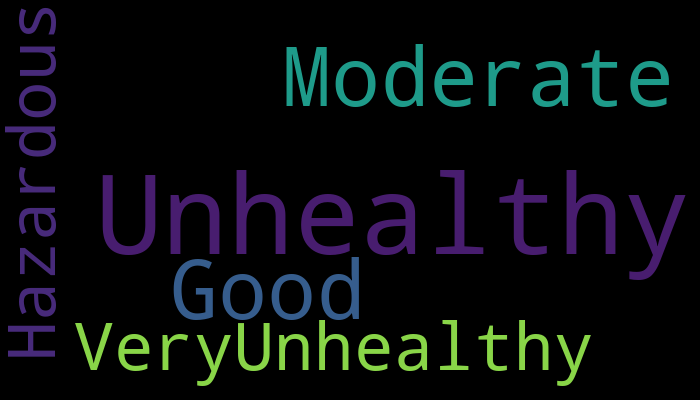

In [166]:
# Wordcloud
categories_name = "Good Moderate UnhealthyS Unhealthy VeryUnhealthy Hazardous"

wordcloud = WordCloud(width=700, height=400, background_color='black', min_font_size=10, collocations=False).generate(categories_name)

# To generate the WordCloud image:
wordcloud.to_image()

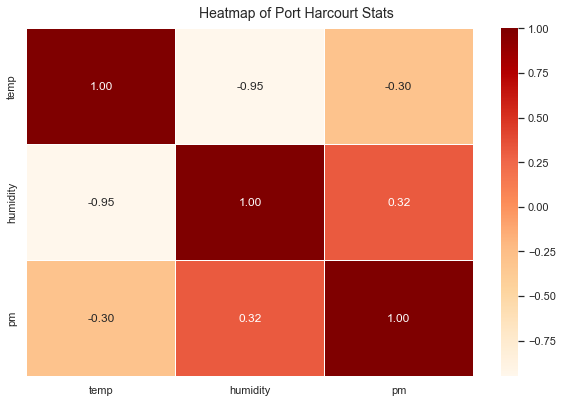

In [153]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df_s[col].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="OrRd",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heatmap of Port Harcourt Stats', fontsize=14)

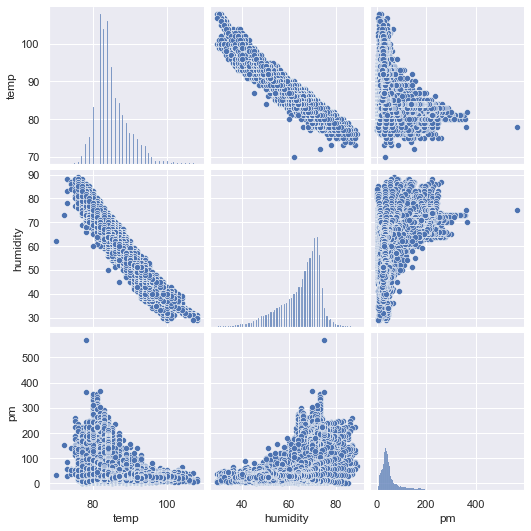

In [155]:
# Determining Correlation
sns.pairplot(df[col]);

***Note:*** There is a high negative correlation between temperature and humidity.  This has significant value during the predictive modeling phase of the project. On the other hand, while not significant, a negative correlation exists between PM and temperature.  There exists a similar correlation (positive) between PM and humidity. 

In [22]:
# Drop duplicates
df = df.drop_duplicates()
df.shape                            #Results when compared to the one earlier point to the absence of duplicates

(56052, 5)

#### Data Type Conversions

In [53]:
# Creating copy of modified dataset
dff = df.copy()
print(id(df))
id(dff)

1593264651712


1593266490096

In [54]:
# Converting date column from string to datatime 
dff['datetime'] = pd.to_datetime(dff['datetime'])
dff.dtypes

datetime    datetime64[ns, UTC]
id                        int64
temp                      int64
humidity                  int64
pm                      float64
dtype: object

In [55]:
#Converting time zone from UTC to Africa/Lagos to reflect local time in Port Harcourt
dff['datetime'] = dff['datetime'].dt.tz_convert('Africa/Lagos')
sub_data = pandasql.sqldf("SELECT * FROM dff LIMIT 10;", globals())
print(sub_data)

                     datetime   id  temp  humidity     pm
0  2021-07-26 17:45:59.000000  198    89        50  40.78
1  2021-07-26 17:48:03.000000  199    89        50  40.09
2  2021-07-26 17:49:59.000000  200    89        50  37.93
3  2021-07-26 17:54:03.000000  201    89        50  33.18
4  2021-07-26 17:55:59.000000  202    89        50  37.84
5  2021-07-26 17:58:11.000000  203    89        50  34.70
6  2021-07-26 18:00:08.000000  204    89        51  33.83
7  2021-07-26 18:02:05.000000  205    89        50  36.20
8  2021-07-26 18:04:02.000000  206    89        50  32.63
9  2021-07-26 18:06:00.000000  207    88        50  32.60


In [56]:
dff.dtypes

datetime    datetime64[ns, Africa/Lagos]
id                                 int64
temp                               int64
humidity                           int64
pm                               float64
dtype: object

In [57]:
# # Creating datetime index passing the datetime column
dff.set_index('datetime', inplace=True)
dff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56052 entries, 2021-07-26 17:45:59+01:00 to 2021-10-25 10:36:44+01:00
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        56052 non-null  int64  
 1   temp      56052 non-null  int64  
 2   humidity  56052 non-null  int64  
 3   pm        56052 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [59]:
dff.head()

,id,temp,humidity,pm
datetime,,,,
2021-07-26 17:45:59+01:00,198,89,50,40.78
2021-07-26 17:48:03+01:00,199,89,50,40.09
2021-07-26 17:49:59+01:00,200,89,50,37.93
2021-07-26 17:54:03+01:00,201,89,50,33.18
2021-07-26 17:55:59+01:00,202,89,50,37.84


In [60]:
# Adding columns with year, month, day and weekday name; breaking down components of time into hour, minutes and seconds
dff['year'] = dff.index.year
dff['month'] = dff.index.month
dff['day'] = dff.index.day
dff['weekday'] = dff.index.day_name()
dff['hr'] = dff.index.hour
dff['min'] = dff.index.minute
dff['sec'] = dff.index.second

In [61]:
#Check
dff.head()

,id,temp,humidity,pm,year,month,day,weekday,hr,min,sec
datetime,,,,,,,,,,,
2021-07-26 17:45:59+01:00,198,89,50,40.78,2021,7,26,Monday,17,45,59
2021-07-26 17:48:03+01:00,199,89,50,40.09,2021,7,26,Monday,17,48,3
2021-07-26 17:49:59+01:00,200,89,50,37.93,2021,7,26,Monday,17,49,59
2021-07-26 17:54:03+01:00,201,89,50,33.18,2021,7,26,Monday,17,54,3
2021-07-26 17:55:59+01:00,202,89,50,37.84,2021,7,26,Monday,17,55,59


In [39]:
# checking for null values in column 'pm'
dff['pm'].isnull().sum()                                 #No Null Values in the dataset

0

In [62]:
dff.dtypes

id            int64
temp          int64
humidity      int64
pm          float64
year          int64
month         int64
day           int64
weekday      object
hr            int64
min           int64
sec           int64
dtype: object

In [63]:
# Creating a copy of the dataframe (dff)
dfv = dff.copy()
print(id(dfv))
print(id(dff))

1593242439056
1593266490096


In [64]:
dfv.dtypes

id            int64
temp          int64
humidity      int64
pm          float64
year          int64
month         int64
day           int64
weekday      object
hr            int64
min           int64
sec           int64
dtype: object

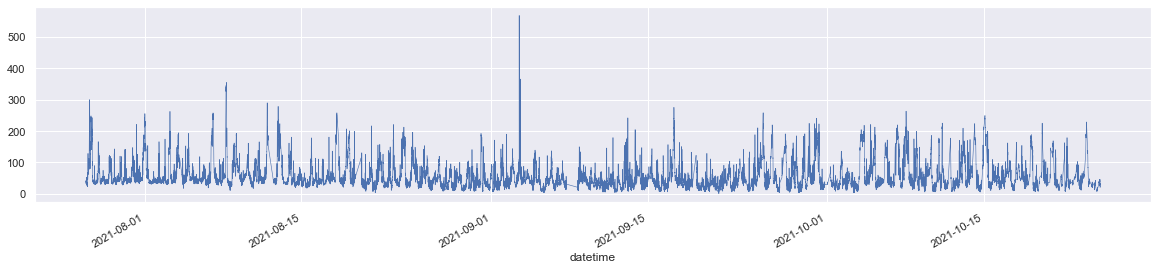

In [287]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 4)})
sns.set_style('darkgrid')
dfv['pm'].plot(linewidth=0.6); 

***Note:*** No discernible trend can be seen in this rendering of particulate readings; however,
a significant spike in poor air quality can be observed around the first week of September 2021

### Q: Determine the number & % of entries in each AQI category over the timeframe of the dataset?

pm
Good               2067
Moderate          18022
Unhealthy-S       19599
Unhealthy         13363
Very Unhealthy     2873
Hazardous           128
dtype: int64


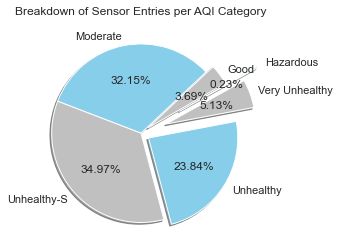

In [152]:
# Calculate the number of entries in each AQI category:
bins = [0, 12, 35, 55, 150, 250, 600]
labels = ['Good', 'Moderate', 'Unhealthy-S','Unhealthy','Very Unhealthy','Hazardous']
s = dfv.groupby(pd.cut(dfv['pm'], bins=bins, labels = labels)).size()
print(s)

# Pie Chart
colours = ['Silver','skyblue']
plt.title('Breakdown of Sensor Entries per AQI Category', pad=7)
plt.pie(s, labels=s.index, startangle=30, autopct='%.2f%%', explode = (0.1, 0.0, 0, 0.1, 0.3 ,0.5), shadow=True, colors=colours);

In [325]:
# Random Query on number of entries with 'Unhealthy' and worse AQI 
sub_dfv = pandasql.sqldf("SELECT * FROM dfv WHERE pm > 34 and pm < 500;", globals())
ans = round((len(sub_dfv)/len(dfv))*100,1)
print("The air quality index in Port Harcourt is rated 'Unhealthy & Worse' in {}% of the entries".format(ans))

The air quality index in Port Harcourt is rated 'Unhealthy & Worse' in 66.4% of the entries


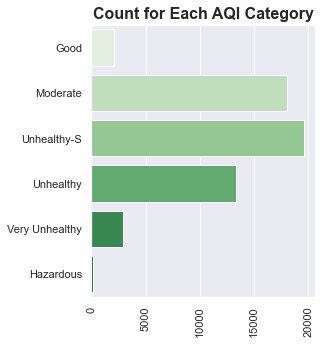

In [146]:
# Alternative view of AQI categories ['#432371',"#FAAE7B"]
sns.countplot(y=dfv.binned,palette= 'Greens')
sns.set(rc={'figure.figsize':(4, 5)})
plt.xticks(rotation=90)
plt.title('Count for Each AQI Category', weight = 'bold').set_fontsize('16')
plt.xlabel(None)
plt.ylabel(None);

### Q. Determine the best and worst days of the week for each AQI category.

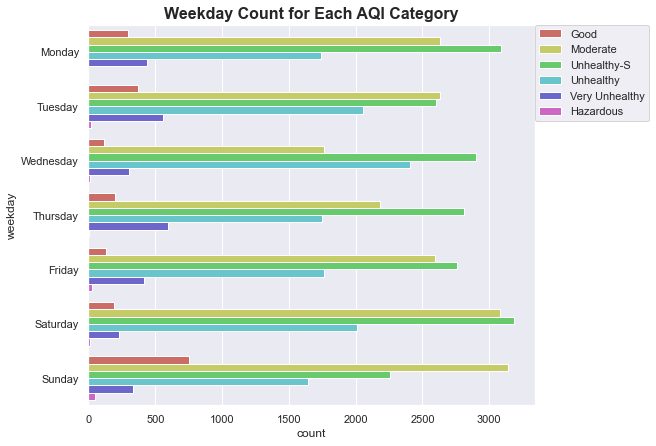

In [163]:
sns.set(rc={'figure.figsize':(8, 7)})
plt.title('Weekday Count for Each AQI Category', weight = 'bold').set_fontsize('16')
sns.countplot(y="weekday", hue = "binned", palette = "hls", data=dfv)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

***Note:***  
Good - Air quality scores the highest on Sunday  
Moderate - Air quality scores the highest on Sunday  
Unhealthy-S - Worst on Saturday for sensitive groups   
Very Unhealthy - Worst on Thursday  
Hazardous - Worst on Sunday  

### Q. Can any hourly trend be seen across the 'Ulhealthy to Hazardous' categories?

In [179]:
# Creating a separate broader 'binned' category column by combining the bins from 'Unhealthy' to 'Hazardous'
dfv['binned-E'] = pd.cut(x=dfv['pm'], bins=[0, 12, 35, 55, 600], labels=['Good', 'Moderate', 'Unhealthy-S','Unhealthy-Hazardous'])

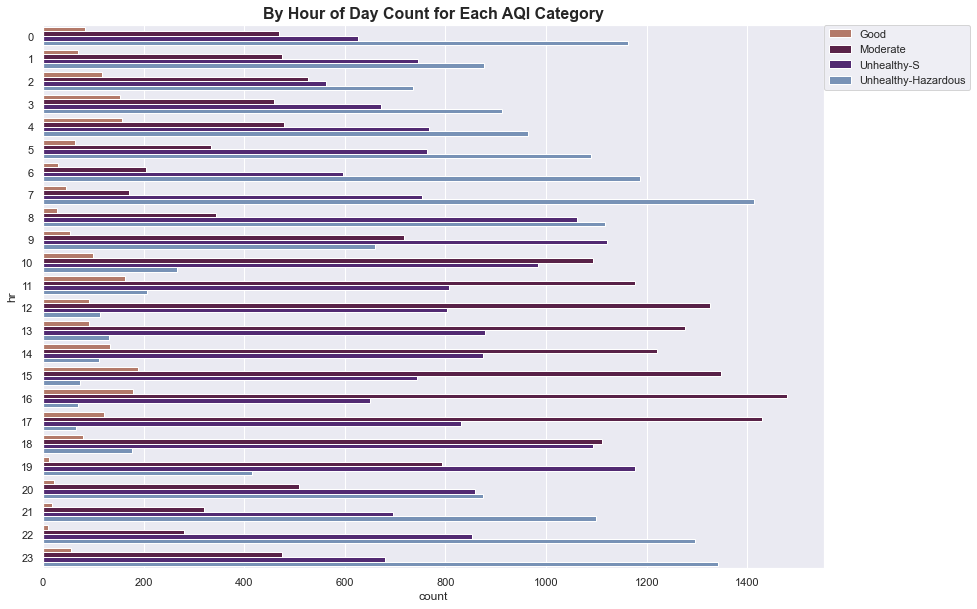

In [186]:
sns.set(rc={'figure.figsize':(14, 10)})
plt.title('By Hour of Day Count for Each AQI Category', weight = 'bold').set_fontsize('16')
plt.ylabel("Hour of Day")
sns.countplot(y="hr", hue = "binned-E", palette = "twilight_r", data=dfv)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

***Note:***  
The "Unhealthy to Hazardous" air qualities show a rising trend in the early hours of the day before
declining from approx. 8am to 5pm local time; thereafter, the rising trend sets in again peaking at around midnight.

### Q. Which month has the highest no. of entries in the 'hazardous' and above categories?

In [194]:
# Replacing month int by month abbreviation
import calendar
dfv['month'] = dfv['month'].apply(lambda x: calendar.month_abbr[x])

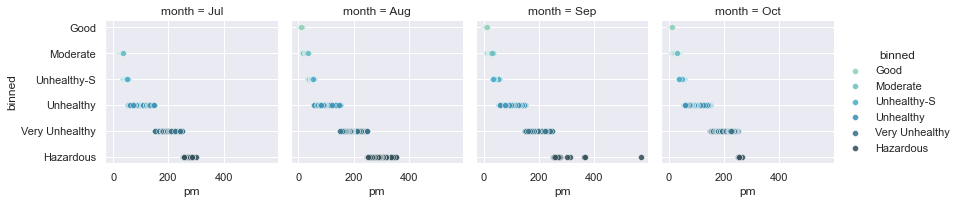

In [239]:
g = sns.FacetGrid(dfv, col="month", hue="binned", palette = 'GnBu_d')
g.map(sns.scatterplot, "pm", "binned", alpha=.9)
g.add_legend();

***Note:***  
August has the maximum number of 'hazardous' sensor readings in the given time period.